In [1]:
%matplotlib notebook
import numpy as np
from astropy.table import Table
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

import aplpy

from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import PercentileInterval, AsinhStretch
from reproject import reproject_interp

from PSimagedownload import *

/Users/ryanr/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
#Download PS image
ra = 359
dec = -21
size = 1280*6
fitsurl = geturl(ra, dec, size=size, filters="i", format="fits")
ps_orig_hdu = fits.open(fitsurl[0])
psout = './Data/ps_image_reduc.fits'
#ps_orig_hdu = Reduce_fits_dim(fits.open(fitsurl[0]),psout)
fits.writeto('./data/ps_test_region.fits',ps_orig_hdu[0].data,ps_orig_hdu[0].header)
# Open TESS original image
path = './Data/tess2018235142941-s0002-1-2-0121-s_ffic.fits'
out = './Data/tess2018235142941-s0002-1-2-0121-s_ffic_reduc.fits'
#path = '/Users/ryanr/Desktop/new-image.fits'
tess_orig = Reduce_fits_dim(path,out)

OSError: File './data/ps_test_region.fits' already exists.

In [5]:
'''
# Fix the header for the PS astrometry fit
wcs_ps = WCS('./data/astrom/PS_wcs.fits')
hdu = fits.open('./data/astrom/PS_astron.fits')
astron_ps = Rewrite_header_wcs(hdu,wcs_ps)
fits.writeto('./data/astrom/ps_astron_corrected.fits',astron_ps[0].data,astron_ps[0].header)

# Fix the header for the TESS astrometry fit
wcs_ps = WCS('./data/astrom/TESS_wcs.fits')
hdu = fits.open('./data/astrom/TESS_astron.fits')
astron_ps = Rewrite_header_wcs(hdu,wcs_ps)
fits.writeto('./data/astrom/tess_astron_corrected.fits',astron_ps[0].data,astron_ps[0].header)
'''

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


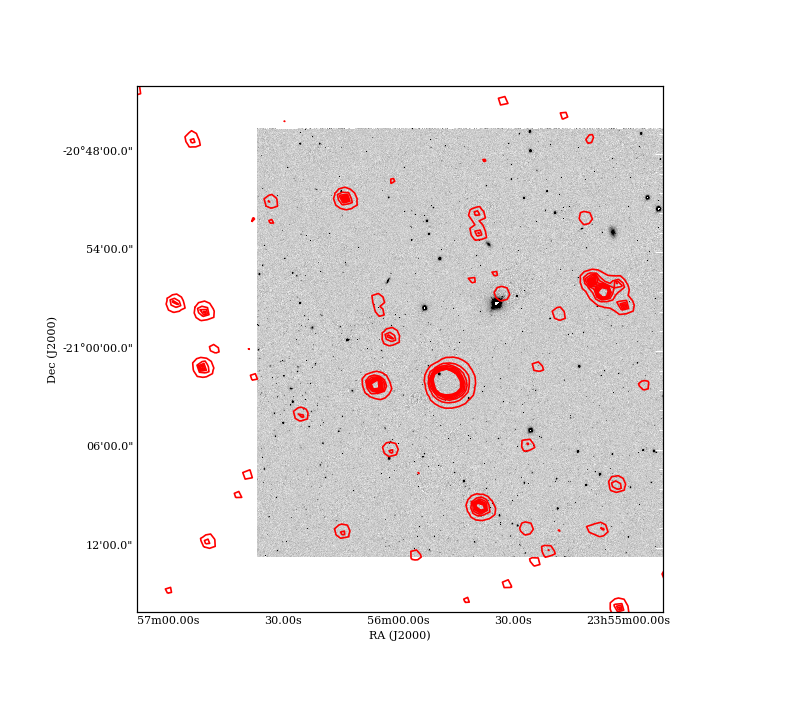

INFO: Auto-setting vmin to -1.019e+03 [aplpy.core]
INFO: Auto-setting vmax to  3.988e+03 [aplpy.core]


/Users/ryanr/anaconda3/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


INFO: Auto-setting resolution to 300 dpi [aplpy.core]


In [15]:
# Look at how PS has been shifted 
fig = aplpy.FITSFigure('./data/ps_test_region.fits')#ps_orig_hdu)
fig.show_colorscale(cmap = 'gray_r')
#fig.show_contour('./data/tess2018235142941-s0002-1-2-0121-s_ffic_reduc.fits', levels= 10, colors='r')
fig.show_contour('./data/astrom/tess_astron_corrected.fits', levels= 10, colors='r')

fig.savefig('PS_orig.pdf')

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


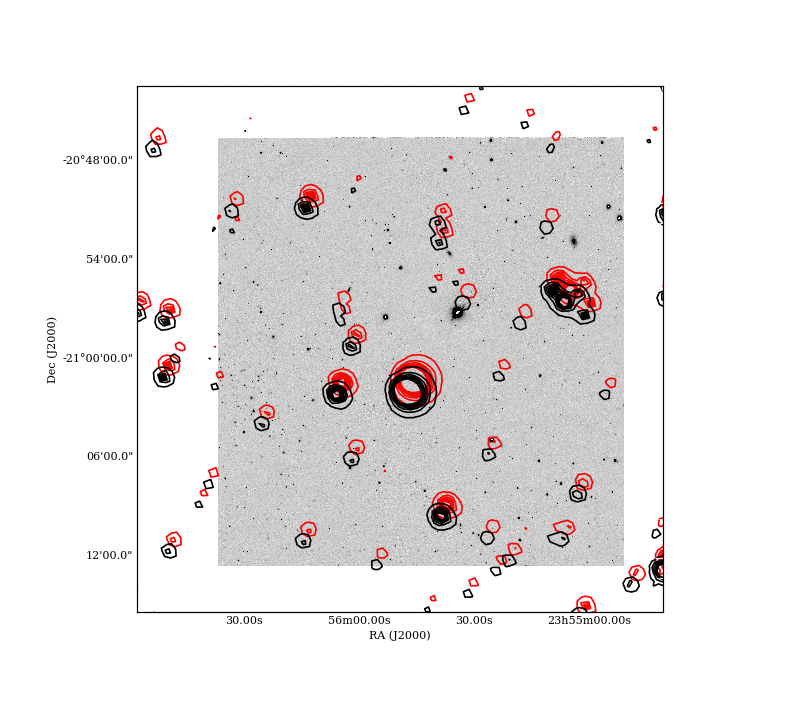

INFO: Auto-setting vmin to -1.019e+03 [aplpy.core]
INFO: Auto-setting vmax to  3.988e+03 [aplpy.core]


/Users/ryanr/anaconda3/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: Auto-setting r

In [19]:
# Look at how PS has been shifted 
fig = aplpy.FITSFigure('./data/astrom/ps_astron_corrected.fits')#ps_orig_hdu)
fig.show_colorscale(cmap = 'gray_r')
fig.show_contour('./data/tess2018235142941-s0002-1-2-0121-s_ffic_reduc.fits', levels= 10, colors='r')
fig.show_contour('./data/astrom/tess_astron_corrected.fits', levels= 10, colors='k')

fig.savefig('PS_astron.pdf')

Astrometry.net doesn't work for the entire FFI. Time to look at a subsection to see if it works.

<IPython.core.display.Javascript object>


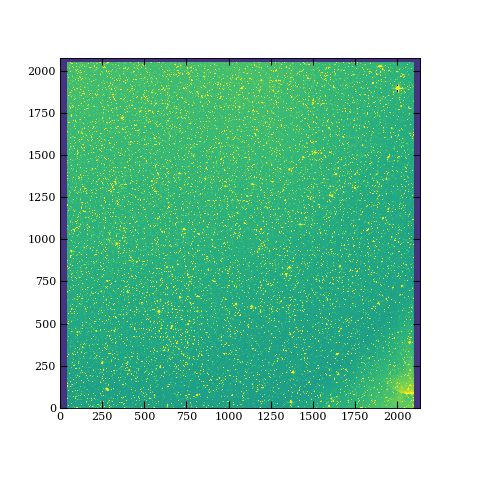

In [19]:
hdu = fits.open('./data/tess2018235142941-s0002-1-2-0121-s_ffic_reduc.fits')
data = hdu[0].data

plt.figure()
plt.imshow(data,origin='lower',vmax = 200)

In [17]:
from astropy.nddata import Cutout2D

<IPython.core.display.Javascript object>


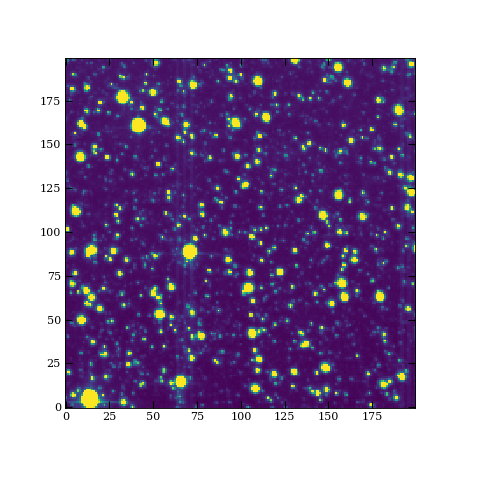

In [20]:
cutout = Cutout2D(data,(413,1435),(200,200))
plt.figure()
plt.imshow(cutout.data,origin='lower',vmax = 200)

In [28]:
cutout.data

array([[121.70547 , 127.61891 , 138.23364 , ..., 120.21407 , 119.80253 ,
        116.650795],
       [123.192825, 142.16405 , 200.72522 , ..., 122.014854, 120.461716,
        117.72863 ],
       [130.92632 , 169.19356 , 342.5726  , ..., 119.362366, 117.86876 ,
        117.01917 ],
       ...,
       [119.69241 , 127.743706, 121.558586, ..., 143.72165 , 205.70053 ,
        140.60202 ],
       [119.23196 , 119.65632 , 119.74969 , ..., 129.08029 , 126.79502 ,
        122.883026],
       [119.20643 , 120.87263 , 119.30036 , ..., 122.61039 , 121.04786 ,
        120.42713 ]], dtype=float32)

In [30]:
hdu = fits.PrimaryHDU(cutout.data)

hdu.writeto('./data/tess_test_region.fits',overwrite=True)

In [37]:
import scipy.misc
scipy.misc.toimage(cutout.data, cmin=np.nanmin(cutout.data), cmax=300).save('outfile.jpg')

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  from ipykernel import kernelapp as app


In [39]:
tess_wcs = WCS('./data/tess2018235142941-s0002-1-2-0121-s_ffic_reduc.fits')
centre = tess_wcs.all_pix2world(413,1435,1)
centre

[array(356.34590543), array(-25.52862723)]

In [3]:
radius = 100*24/.25
radius

9600.0

In [21]:
1280*6

7680

In [4]:
fitsurl = geturl(356.34590543, -25.52862723, size=int(radius), filters="i", format="fits")
ps_region = fits.open(fitsurl[0])
fits.writeto('./data/ps_section_tess_test.fits',ps_region[0].data,ps_region[0].header,overwrite=True)

In [42]:
# Fix the header for the TESS astrometry fit
wcs_ps = WCS('./data/astrom/tess_section_wcs.fits')
hdu = fits.open('./data/astrom/tess_section_astron.fits')
astron_ps = Rewrite_header_wcs(hdu,wcs_ps)
fits.writeto('./data/astrom/tess_section_astron_corrected.fits',astron_ps[0].data,astron_ps[0].header,overwrite=True)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


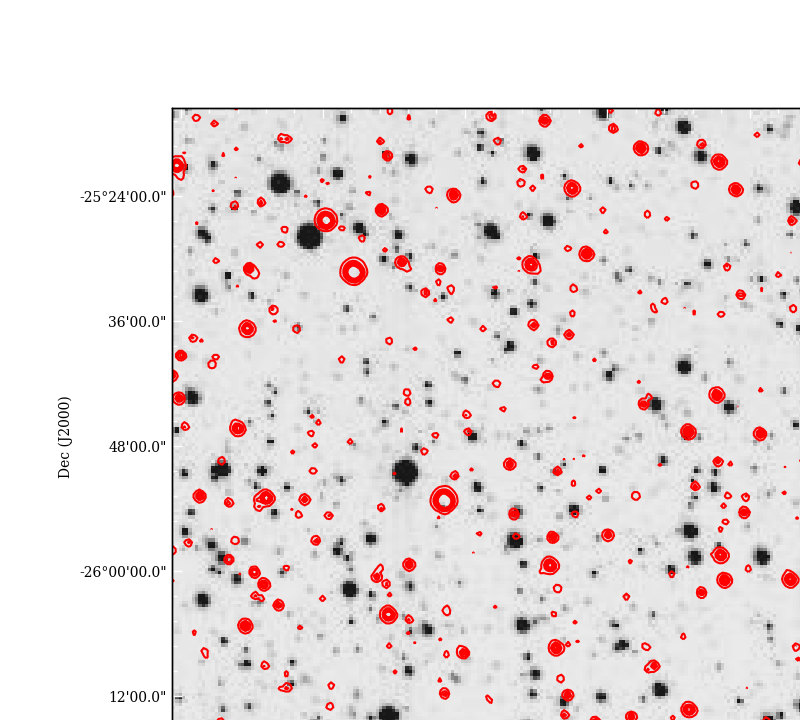

INFO: Auto-setting vmin to -2.550e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.831e+02 [aplpy.core]


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


KeyboardInterrupt: 

In [ ]:
# Look at how PS has been shifted 
fig = aplpy.FITSFigure('./data/astrom/tess_section_astron_corrected.fits')#ps_orig_hdu)
fig.show_colorscale(cmap = 'gray_r')
fig.show_contour('./data/tess2018235142941-s0002-1-2-0121-s_ffic_reduc.fits', levels= 10, colors='r')
#fig.show_contour('./data/astrom/tess_astron_corrected.fits', levels= 10, colors='k')

fig.savefig('PS_astron.pdf')

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


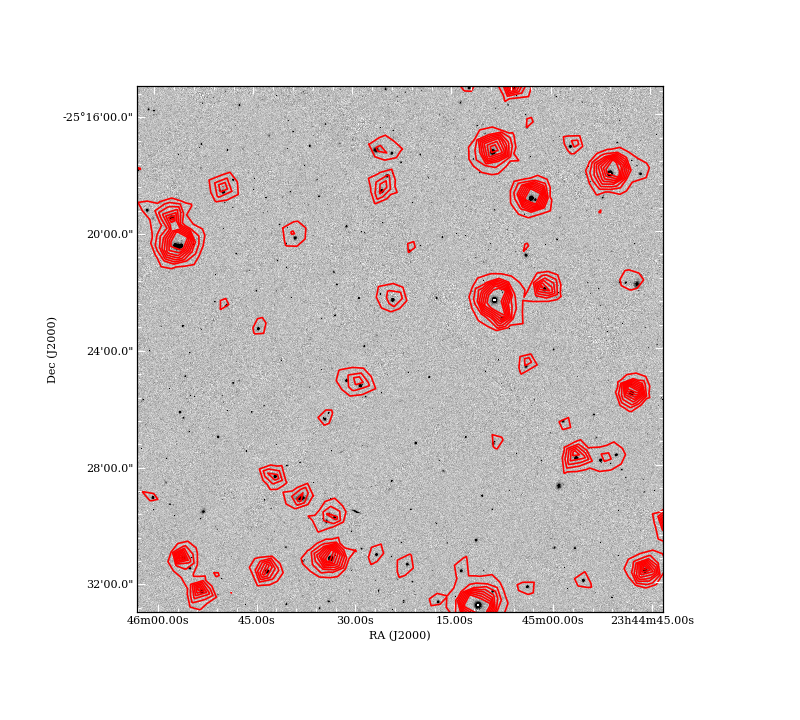

INFO: Auto-setting vmin to -8.429e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.420e+03 [aplpy.core]


/Users/ryanr/anaconda3/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


INFO: Auto-setting resolution to 300 dpi [aplpy.core]


In [14]:
# Look at how PS has been shifted 
fig = aplpy.FITSFigure('./data/ps_section_tess_test.fits')#ps_orig_hdu)
fig.show_colorscale(cmap = 'gray_r')
#fig.show_contour('./data/tess2018235142941-s0002-1-2-0121-s_ffic_reduc.fits', levels= 10, colors='r')
fig.show_contour('./data/astrom/tess_section_astron_corrected.fits', levels= 10, colors='r')
fig.recenter(356.34590543, -25.4, radius=.15)
fig.savefig('tess_section.pdf')

Using a smaller region of 200x200 works well. This is likely too small for large scale automation however, so lets see what size will still work.

In [25]:
fig = aplpy.FITSFigure('./data/tess2018235142941-s0002-1-2-0121-s_ffic_reduc.fits')#ps_orig_hdu)
fig.show_colorscale(cmap = 'gray_r')

TypeError: __init__() got an unexpected keyword argument 'vmax'

In [29]:
size = 5/0.00694444
size

720.000460800295

In [28]:
500*0.00694444

3.4722199999999996

<IPython.core.display.Javascript object>


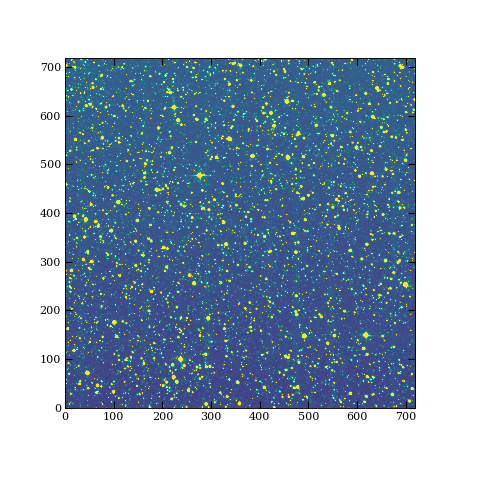

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


In [33]:
cutout = Cutout2D(data,(450,1600),(720,720))
plt.figure()
plt.imshow(cutout.data,origin='lower',vmax = 200)

import scipy.misc
scipy.misc.toimage(cutout.data, cmin=np.nanmin(cutout.data), cmax=300).save('tess_5deg_test.jpg')

In [42]:
tess_wcs = WCS('./data/tess2018235142941-s0002-1-2-0121-s_ffic_reduc.fits')
centre = tess_wcs.all_pix2world(450,1600,1)

In [34]:
# Fix the header for the TESS astrometry fit
wcs_ps = WCS('./data/astrom/tess_5deg_wcs.fits')
hdu = fits.open('./data/astrom/tess_5_deg_test.fits')
astron_ps = Rewrite_header_wcs(hdu,wcs_ps)
fits.writeto('./data/astrom/tess_5deg_test_corrected.fits',astron_ps[0].data,astron_ps[0].header,overwrite=True)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


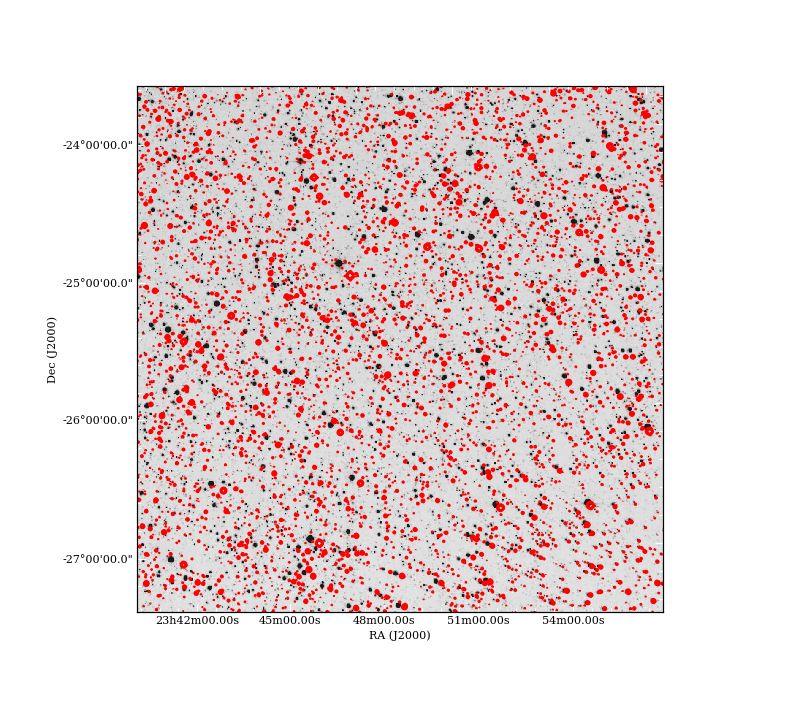

INFO: Auto-setting vmin to -5.700e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.811e+02 [aplpy.core]


In [35]:
# Look at how PS has been shifted 
fig = aplpy.FITSFigure('./data/astrom/tess_5deg_test_corrected.fits')#ps_orig_hdu)
fig.show_colorscale(cmap = 'gray_r')
fig.show_contour('./data/tess2018235142941-s0002-1-2-0121-s_ffic_reduc.fits', levels= 10, colors='r')
#fig.show_contour('./data/astrom/tess_astron_corrected.fits', levels= 10, colors='k')

In [50]:
from urllib.error import URLError
from socket import timeout

In [52]:
def Get_PS_cutout(ra,dec,size):
    fitsurl = geturl(ra, dec, size=int(size), filters="i", format="fits")
    try:
        ps_region = fits.open(fitsurl[0])
        return ps_region
    except (URLError,timeout) as e:
        print('Time out')
        return np.nan
    
fits.writeto('./data/ps_5deg_tess_test.fits',ps_region[0].data,ps_region[0].header,overwrite=True)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


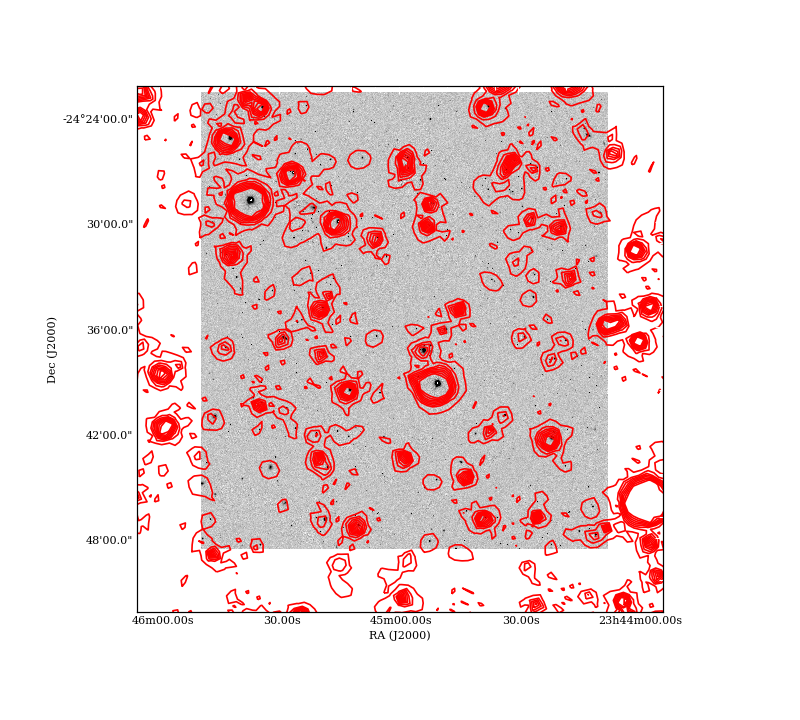

INFO: Auto-setting vmin to -9.303e+02 [aplpy.core]
INFO: Auto-setting vmax to  3.114e+03 [aplpy.core]


/Users/ryanr/anaconda3/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


In [58]:
# Look at how PS has been shifted 
fig = aplpy.FITSFigure('./data/ps_5deg_tess_test.fits')#ps_orig_hdu)
fig.show_colorscale(cmap = 'gray_r')
#fig.show_contour('./data/tess2018235142941-s0002-1-2-0121-s_ffic_reduc.fits', levels= 10, colors='r')
fig.show_contour('./data/astrom/tess_5deg_test_corrected.fits', levels= 10, colors='r')
fig.recenter(356.25, -24.62, radius=.25)
#fig.savefig('tess_section.pdf')

In [ ]:
from 